## **Assignment - 6: Fashion-MNIST 𝑡-Distributed Stochastic Neighbor Embedding (𝑡-SNE)**
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

## **Data Loading & Exploration**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mnist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/fashion-mnist_train.csv')

In [4]:
mnist.shape

(60000, 785)

In [5]:
mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = mnist["label"]
mnist_df = mnist.drop("label",axis = 1)
print(mnist_df.head())
mnist_df.shape

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

(60000, 784)

## **Data Preperation**

### Working on the whole 60k MNIST data points 

In [7]:
labels = y
data_mnist = mnist_df

In [8]:
data_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("The shape of labels: ",labels.shape,"\nThe shape of sample data: ",data_mnist.shape)

The shape of labels:  (60000,) 
The shape of sample data:  (60000, 784)


In [10]:
# Data pre-processing :
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data_mnist)
print("Shape of standardized data: ", X.shape)

Shape of standardized data:  (60000, 784)


## **t-SNE on MNIST Data With Perplexity = 30**

In [11]:
# Fix "random_state" to help stabilize t-SNE model outputs.
tsne_model = TSNE(n_components=2,random_state=0)
new_X_tsne = tsne_model.fit_transform(X)

Shape of Finale Dataframe: (60000, 3)
   1st_Component  2nd_Component  label
0      -8.255243      -8.123245    2.0
1      -2.849217     -45.610157    9.0
2      11.015272      36.822155    6.0
3     -29.741610       3.310348    0.0
4      38.382523      23.991970    3.0


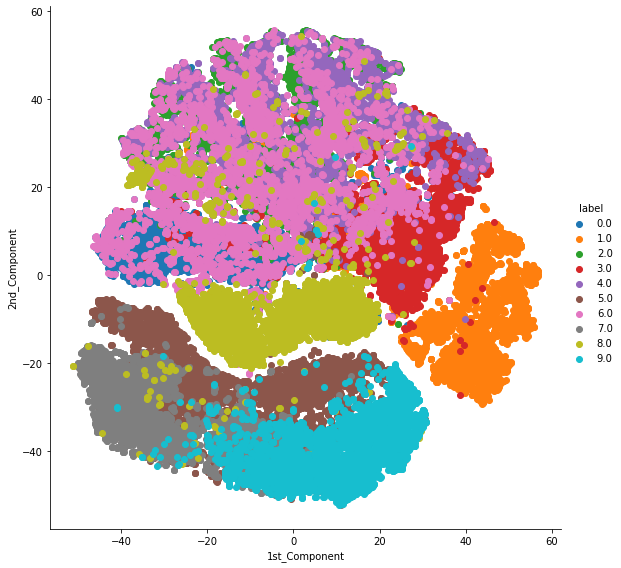

In [12]:
new_coor_tsne = np.vstack((new_X_tsne.T,labels)).T
final_tsne_df = pd.DataFrame(new_coor_tsne,columns=("1st_Component", "2nd_Component", "label"))
print("Shape of Finale Dataframe:",final_tsne_df.shape)
print(final_tsne_df.head())
plt.close()
sns.FacetGrid(final_tsne_df,hue="label",height=8).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.show()

## **Observation:** 
### Even with perplexity = 30, we got roughly the ten data points clusters for our ten digits.

## **t-SNE on MNIST Data With Perplexity = 50, Step = 5000**

In [13]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
new_X_tsne50 = model.fit_transform(X)

Shape of Finale Dataframe: (60000, 3)
   1st_Component  2nd_Component  label
0     -93.377678     -14.458447    2.0
1      -4.065659    -129.757004    9.0
2      21.911451     106.374451    6.0
3     -49.602829       6.628134    0.0
4      84.928535      58.143101    3.0


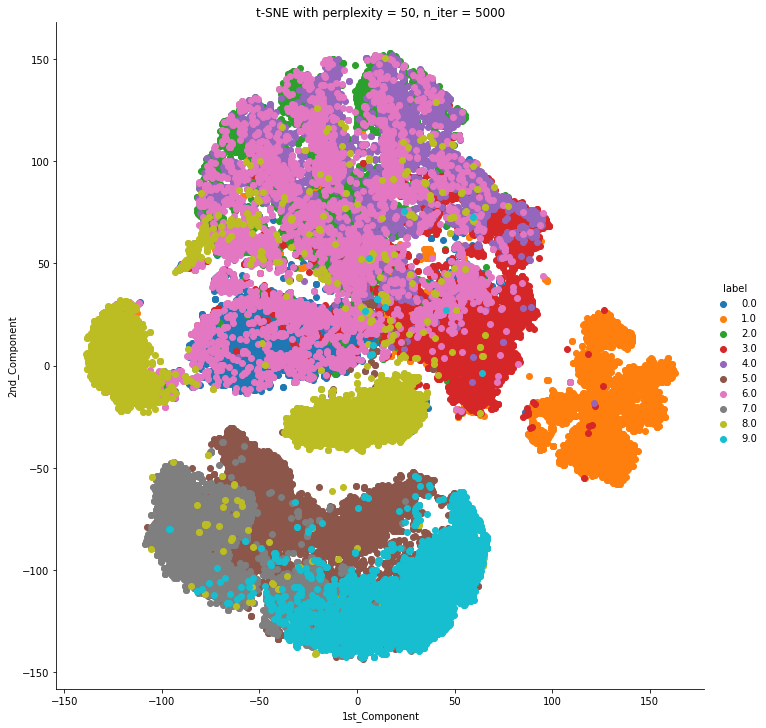

In [14]:
new_tsne = np.vstack((new_X_tsne50.T,labels)).T
final_tsne_df = pd.DataFrame(new_tsne,columns=("1st_Component", "2nd_Component", "label"))
print("Shape of Finale Dataframe:",final_tsne_df.shape)
print(final_tsne_df.head())
plt.close()
sns.FacetGrid(final_tsne_df,hue="label",height=10).map(plt.scatter,"1st_Component", "2nd_Component").add_legend()
plt.title("t-SNE with perplexity = 50, n_iter = 5000")
plt.show()

## **Observations:**
### With perplexity = 50, step = n_iter = 5000, the ten data points clusters for our ten digits easily detectable now. Though there is still some overlapping, to improve the clustering further, we can slice the data, take some sub-data frames (2000 or 1000 rows), try many combinations of (perplexity, n_iterations), and pick up the best one.